# Classification Approch

#  رویکرد KNN رویکردی مناسب تری بود
## Lineaer


              precision    recall  f1-score   support

           N       0.86      0.96      0.91        26
           O       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)


## Work flow
0. [X] Clean and Engeering Data for X and y
1. [X] Split Data in Train/Test for X and y
2. [X] Scaler on Training X & X test
3. [x] Create Model(s)
4. [x] Fit/Train Model(s) on X Train
5. [ ] Evaluate Model(s) on X test
6. [ ] Adjust Param as Necessary
7. [ ] Bonus: Save Model(s)

### PreProcess


In [2]:
cols = ['Season','Age','Childish diseases','Trauma','Surgical','High fever','Alcohol consumption','Smoking','Sitting hour/day','Output']
df= pd.read_csv('../fertility_Diagnosis.txt',names=cols)
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Clean and Engeering Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               100 non-null    float64
 1   Age                  100 non-null    float64
 2   Childish diseases    100 non-null    int64  
 3   Trauma               100 non-null    int64  
 4   Surgical             100 non-null    int64  
 5   High fever           100 non-null    int64  
 6   Alcohol consumption  100 non-null    float64
 7   Smoking              100 non-null    int64  
 8   Sitting hour/day     100 non-null    float64
 9   Output               100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
#df['Output']= df['Output'].map({'N':1,'O':0})

In [5]:
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Split Data in Train/Test for X and y


In [6]:
X = df.drop(['Output'],axis=1)
y = df['Output']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1099,stratify=y)
y.value_counts()

Output
N    88
O    12
Name: count, dtype: int64

### Model

#### Create Model(s)

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
scale = StandardScaler()
gbc = GradientBoostingClassifier()

In [43]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [44]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
n_estimators = list(range(1,101,1))
max_features = [1.0, 'sqrt', 'log2']
criterion = ['friedman_mse', 'squared_error']

In [46]:
pipe =Pipeline([('gbc',gbc)])


In [47]:
hyp_par = {'gbc__criterion' : criterion,
 'gbc__max_features': max_features,
 'gbc__n_estimators': n_estimators,
          }

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
full_model = GridSearchCV(pipe,hyp_par,cv=2,scoring='accuracy')


#### Train Model

In [50]:
full_model.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__criterion': ['friedman_mse', 'squared_error'],
                         'gbc__max_features': [1.0, 'sqrt', 'log2'],
                         'gbc__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]},
             scoring='accuracy')

### Evaluate model

#### Test On data

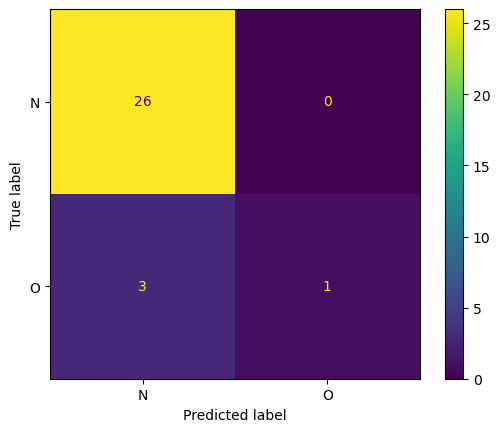

In [51]:
y_pred =full_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred),display_labels=full_model.classes_).plot()

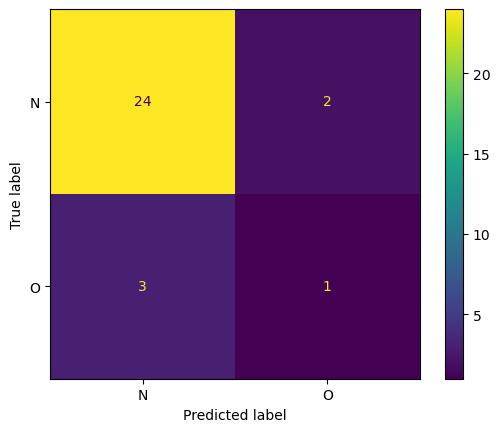

In [54]:
y_pred =full_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred),display_labels=full_model.classes_).plot()

In [52]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           N       0.90      1.00      0.95        26
           O       1.00      0.25      0.40         4

    accuracy                           0.90        30
   macro avg       0.95      0.62      0.67        30
weighted avg       0.91      0.90      0.87        30



In [45]:
full_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('abc', AdaBoostClassifier(algorithm='SAMME', n_estimators=1))],
 'verbose': False,
 'abc': AdaBoostClassifier(algorithm='SAMME', n_estimators=1),
 'abc__algorithm': 'SAMME',
 'abc__base_estimator': 'deprecated',
 'abc__estimator': None,
 'abc__learning_rate': 1.0,
 'abc__n_estimators': 1,
 'abc__random_state': None}

### Final Model(s)


#### Train on all Data 

##### no need

#### Save with joblib

In [54]:
import joblib


In [55]:
joblib.dump(value=full_model,filename='Gradiant_boost.pkl')

['Gradiant_boost.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
